Mean Squared Error: -0.5257104326777


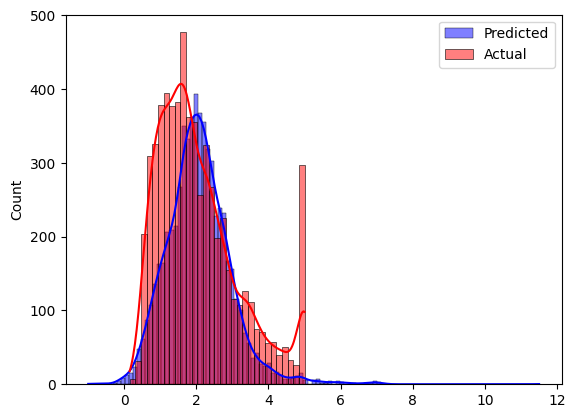

R2 Score: 0.5957702326061664


In [17]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = fetch_california_housing()
dataset = pd.DataFrame(df.data, columns=df.feature_names)
X = dataset
y = df.target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

regression = LinearRegression()
regression.fit(X_train, y_train)

# Cross-validation
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Mean Squared Error:", np.mean(mse))

# Predictions
reg_predict = regression.predict(X_test)

# Plot Predictions
sns.histplot(reg_predict, label="Predicted", kde=True, color="blue")
sns.histplot(y_test, label="Actual", kde=True, color="red")
plt.legend()
plt.show()

# Model Score
score = r2_score(y_test, reg_predict)
print("R2 Score:", score)